## Binary Classification with Keras using MNIST digit dataset


We want to build a binary classification model that determines:

- Label = 1 → Image represents digit 3
- Label = 0 → Image represents anything other than 3

Train a Keras CNN to classify digit **4 vs not-4** using MNIST.

### MNIST = Modified National Institute of Standards and Technology

It is a processed and standardized version of handwritten digit data originally collected by NI

| Attribute         | Description         |
| ----------------- | ------------------- |
| Data type         | Grayscale images    |
| Image size        | **28 × 28 pixels**  |
| Pixel values      | 0–255               |
| Number of classes | **10 digits (0–9)** |
| Training samples  | **60,000 images**   |
| Test samples      | **10,000 images**   |


## Step 1: Import Libraries

In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

## Step 2: Load MNIST Data

In [16]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


## Step 3: Binary Label Engineering
- Digit **3 → 1**
- All other digits → **0**

In [17]:
y_train_bin = (y_train == 3).astype(int)
y_test_bin  = (y_test == 3).astype(int)

print('Number of 3s:', y_train_bin.sum())

Number of 3s: 6131


## Step 4: Preprocessing (Flatten + Normalize)

We divide by 255 so that pixel values are on the same scale as neural network weights, enabling stable learning

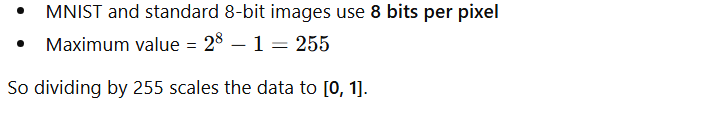

In [18]:
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

x_train = x_train.reshape(-1, 28 * 28)
x_test  = x_test.reshape(-1, 28 * 28)

print('Input shape:', x_train.shape)

Input shape: (60000, 784)


## Step 5: Dense Neural Network Model 

In [23]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 108,801 (425.00 KB)

 Trainable params: 108,801 (425.00 KB)

 Non-trainable params: 0 (0.00 B)

## Step 6: Model Training

In [24]:
history = model.fit(
    x_train,
    y_train_bin,
    epochs=20,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9758 - loss: 0.0742 - val_accuracy: 0.9905 - val_loss: 0.0281
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9909 - loss: 0.0276 - val_accuracy: 0.9938 - val_loss: 0.0191
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9938 - loss: 0.0183 - val_accuracy: 0.9942 - val_loss: 0.0187
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9961 - loss: 0.0124 - val_accuracy: 0.9945 - val_loss: 0.0173
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9973 - loss: 0.0084 - val_accuracy: 0.9947 - val_loss: 0.0189
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9977 - loss: 0.0068 - val_accuracy: 0.9938 - val_loss: 0.0232
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9986 - loss: 0.0046 - val_accuracy: 0.9933 - val_loss: 0.0269
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9981 - loss: 0.0053 - val_accuracy: 0.

## Step 7: Evaluation

In [25]:
loss, acc = model.evaluate(x_test, y_test_bin, verbose=0)
print('Test Accuracy:', acc)

Test Accuracy: 0.9947999715805054


## Step 8: Decision-Boundary Intuition (Conceptual)

Although the input space is **784-dimensional**, the Dense network is learning a **non-linear decision boundary** that separates:

- Images that *look like a 3*
- Images that *do not look like a 3*

The sigmoid output represents the **distance from this boundary**:
- Values close to **1.0** → confidently classified as *3*
- Values close to **0.0** → confidently classified as *not-3*
- Values near **0.5** → ambiguous / near the decision boundary

## Step 9: Visualizing Confidence on Sample Images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


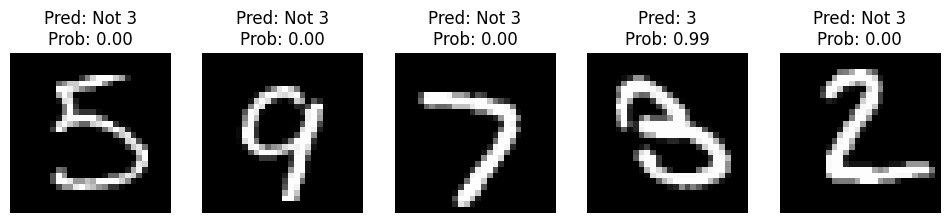

In [26]:
indices = [15, 16, 17, 18,1 ]
samples = x_test[indices]
preds = model.predict(samples)

plt.figure(figsize=(12, 3))
for i, idx in enumerate(indices):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[idx].reshape(28,28), cmap='gray')
    plt.axis('off')
    prob = preds[i][0]
    label = '3' if prob >= 0.5 else 'Not 3'
    plt.title(f'Pred: {label}\nProb: {prob:.2f}')
plt.show()